# Lab2: Binary classification and model evaluation
---

Result of that lab is a **report** in ipynb format. This course is not about coding, so the less code you write the better. It is easier to find mistakes and expand or modify experiments.
![E=(mc)^2 : errors = (more code)^2](https://pp.userapi.com/c638722/v638722272/1f4b3/J0mqkFTF0IY.jpg)

Try to write you report as interesting story by consequently answer questions from the task. 

**($\star$)** questions add no extra points to assessment, but boost your skills and karma a little bit  

## 1. Spam classification

Let's try to build machine learning models to divide spam from non-spam. 

Dataset: [UCI](https://archive.ics.uci.edu/ml/datasets.html)

Each object in dataset is a letter with features based on text, spam is a positive example, normal letter - negative.

#### Task
   - Download dataset [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase) . (Code is provided bellow)
   - How many letters in a dataset ?
   - Which portion of them is bad (spam) ?
   - How you can group letters' features ?

## 2. Classifier training and  it's evaluation

We want our model to generalize well. That means to predict class on the data that we did not see during training phase.
In order to achive this model should be trained and evaluated on independent sets of examples. Usually, we divide our dataset to two subsets: `train` and `test`. (sometimes we need to split on 3 sets `train`, `validation`, `test`). How to split the data is a compromise: bigger `train` gives you more information and you can build <font color='red'>_better_</font>  algorithms, on the other hand more control examples from `test` would give you less noisy estimate of model quality. 

For model evaluation you will analyse [confusion matrix](http://en.wikipedia.org/wiki/Confusion_matrix): Each column of the matrix represents the instances in a predicted class while each row represents the instances in an actual class. 

![Confusion matrix](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

Diagonal consists of correctly classified positive (True positive - TP) and negative (TN) examples. There are two types of errors. False Positive (FP) — type I erros (false activation, good letter went to spam), False Negative (FN) — type II errors (did not filter span). <font color='red'>**Errors of type I and II could have different cost.**</font>

<img src="https://pp.userapi.com/c837427/v837427272/130f4/PJX8E_FvkG8.jpg" alt="Types of errors" style="width: 300px;"/>

For binary classification we have following quality metrics:
  - Accuracy = (TP + TN) / (TP + TN + FP + FN)  — _fraction of correct predictions_
  - Precision = TP / (TP + FP)  — _accuracy, fraction of real spam in the letters classified as spam_
  - Recall = TP / (TP + FN)  — _completeness, fraction of filtered spam_
  - F1 = 2TP / (2TP + FP + FN)  — _harmonic mean of precision and recall_
  
More information you can find here: [Precision and Recall](http://en.wikipedia.org/wiki/Precision_and_recall).

#### Task 
   - Split dataset into to disjoint subsets: `train` - first 3000 examples (≈65%), `test` - all others
   - Train decesion tree with `train`. Classify examples from `test`. Calculate classification quality metrics, described above: Accuracy, Precision, Recall, F1.  [Recommended parameters: split criteria - gini, max_depth: 7]
   - Which drawbacks does evaluation on this `test` have? How you can make evalution more informative?
   - Repeat experiment with dataset shuffled before `split`.
   - Which features are the most informative? Use feature importance from DecisionTreeClassifier.
   - What you can say about quality of the best constant model (constant model always predicts one class)
   - Train KNN model and evaluate it on `test`. [ Recommended parameters: K=10, euclidian metric ]
   - Train KNN for rescaled features. Evaluate quality of the model on `test`. Does that feature transformation increased given metrics for KNN? Repeat experiment for DecisionTree. Why rescaling has no effect on the quality of decision tree?
   - Compare all models by all metrics.
   - ($\star$) To find better `train_test_split` you can conduct following experiment: grid search split proportion, for every threshold generate big number of splittings and compute error (according to chosen metric). Then plot dependence of error on split threshold. Choose threshold that gives least variation of the error. Choose metric and plot error standard deviation as function of split threshold. 
   
  Rescaling methods:
  - $x_{new} = \frac{x - \mu}{\sigma}$, $\mu, \sigma$ — mean, and standard deviation
  - $x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}$, $[x_{min}, x_{max}]$ — minimal interval of features' values
  
  As a result of this task you should get following models and compare them between each other: 
  1. Constant model
  2. Decision tree
  3. KNN
  4. KNN with rescaling

## 3. Classification threshold selection

Many classification models give estimation of  belonging to the class  $\tilde{y}(x) \in R$. Then decision about the class is made by comparing that estimation to some threshold:

$y(x) = +1$,  if $\tilde{y}(x) \geq \theta$, $y(x) = -1$, if $\tilde{y}(x) < \theta$

Confusion matrix and all derivatives (Accuracy, Precision, Recall, etc.) depend on $\theta$:

In order to show the variation of metrics from threshold, you can draw coordinate plane with axis as metrics and the shape of the figure will show you quality of the model.  
![ROC-curve construction principle and threshold](https://upload.wikimedia.org/wikipedia/commons/8/8c/Receiver_Operating_Characteristic.png)

Most popular curve from such class is ROC-curve (TP-vs-FP plane) and Precision/Recall curves. ROC-curve stands for [Receiver Operating Characteristic](en.wikipedia.org/wiki/Receiver_operating_characteristic).
![ROC-curves examples](http://arogozhnikov.github.io/images/roc_curve.gif)

[interactive example](http://arogozhnikov.github.io/2015/10/05/roc-curve.html)

In the case, if you need to compare quality of classifier without assumptions about threshold, you can use summary statistics or integral metrics based on ROC curve. For example AUC-ROC (**A**rea **U**nder RO**C**) - area under the ROC curve of classifier. AUC-ROC of ideal classifier is 1. Ideal **random** classifier has AUC-ROC about 0.5.


#### Task
  - Whick classifier has AUC-ROC near 0?
  - Is it correct, that classifier from previous part #2 to identify class compare some estimatino with threshold? What are those estimations? What thresholds were chosen?
  - For all models from previous task:
      - Draw ROC and Precision/Recall curves on the same coordinate plane with different colors. Add legend: which curve corresponds to which classifier.
      - Compare AUC-ROC.
  - What maximal Recall of spam classification can models achive if you have strict constraint on accuracy: it should not be below 90%?
  - ($\star$) Mark classifiers builded in the previous part with points of different color and shape on the Precision/Recall plane. Add legend: which points correspond to which model. Show isoline of F1 metric (where F1 metric has the same value).
  - ($\star$) Suggest exact effective algorithm to compute AUC-ROC metric with complexity $O(n \log n)$, where $n$ - number of test examples. 

## 4. Cross-validation and parameter selection

Each model of machine learning has many structural parameters and parameters of learning: number of neighbours, length function in KNN, max tree depth, mininal number of objects in leafs and so on. There is no universal set of parameters which would be optimal for all given tasks. For every new task you should select other set of parameters.

For model's parameters' optimization researchers usually use _grid search_ : pick several values for every parameter, then evaluate every combination of parameters, and choose the best set from the point of optimized metric.

If you try a lot of models, it might appear that the best model on `train` did not perserve it's quality on `test` set. We can conclude that in this case model was _overfitted_ to given `train`. 

To get rid of that problem we can split out dataset on 3 disjoint subsets: `train`, `validation` and `test`
![Разбиение на train, validation и test](http://2.bp.blogspot.com/-jkEGMO5lb8A/VmIj1SWT8KI/AAAAAAAAAAs/XTUClFffcX4/s1600/Screen%2BShot%2B2015-12-04%2Bat%2B6.37.34%2BPM.png)

`Validation` set is used to compare models when tuning hyperparameters of the model. `Test` is for final assessment of the models.

There is more robust method of objective model comparison - [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)). 
There exist different types of that general scheme: 
   - Leave-One-Out
   - K-Fold
   - Repeated random sub-sampling

Cross-validation is computationally expensive, especially if you do exhaustive grid search with big number of combinations. You should consider following trade-offs:
   - you can take more sparse grid, considering less values for each parameter. But you can miss good combination then;
   - you can use less partitions or folds, in that case the estimate of cross-validation score becomes more noisy and you have higher risk to make not optimal set of parameters, because of the randomness of partition;
   - you can optimize parameters greedily (one by one, consequently), that strategy is not always optimal;
   - use random sub-sampling of parameters instead of exhaustive search.
   
#### Task

   - Choose cross-validation method, one from described above. Fixate cross-validation split of `train` set. You should cross-validate on `train` samples from previous tasks, `test` should stay independent. Pay attention: when comparing models, cross-validation split must not change.
   - Choose one metric for optimization by grid search. _Example: AUC-ROC._
   - Find optimal set of parameters for tree with grid search. Parameters for grid: split criterion, max depth, number of features for node, min number of objects in the leaf (of only some of offered parameters)
   - Find optimal set of parameters for KNN using grid search. Parameters for grid: K, metric, weight scheme.
   - ($\star$) [Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) -  any test or metric that relies on random sampling with replacement. Can you use different bootstrapping methods for training and evaluating your models?

## Usefull functions of SciKit-Learn

These functions will make compliting this lab a pleasure for you.

- Module for quality evaluation and cross-validation [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html):
    - dataset split [`train_test_split()`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split)
    - iterators for cross-validation splits [`LeaveOneOut`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.LeaveOneOut.html#sklearn.cross_validation.LeaveOneOut), [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html#sklearn.cross_validation.KFold), [`ShuffleSplit`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.ShuffleSplit.html#sklearn.cross_validation.ShuffleSplit)
    - always use `random_state` parameter, it will make your experiments reproducible.
- Module with metrics [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
  - [`accuracy_score(y_true, y_pred)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
  - [`precision_recall_fscore_support(y_true, y_pred)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)
  - [`roc_curve(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)
  - [`precision_recall_curve(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)
  - [`roc_auc_score(y_true, y_score)`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
- Module for data preprocessing [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/preprocessing.html)
    - function for feature standartization [`scale(X)`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale)
    - class that helps to map your features into [0-1] interval [`MinMaxScaler().fit_transform(X)`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)
- Module for grid search [`sklearn.grid_search`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.grid_search)
    - Class [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV) - implements exhaustive search on a given grid
    - Class [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html#sklearn.grid_search.RandomizedSearchCV) - implements random search of parameters
- Class for constant classifier  [`DummyClassifier(strategy='constant', constant=0)`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier)

  
### Manual, docs and examples

- [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- [Parameter optimization with cross-val grid search](http://scikit-learn.org/stable/auto_examples/grid_search_digits.html)
- [ROC-curves](http://scikit-learn.org/stable/auto_examples/plot_roc.html), [Precision-Recall кривые](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html)
- [Feature importance in decesion trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#example-ensemble-plot-forest-importances-py)

# Examples

Use this jupyter notebook **`magic`** to be able to plot figures directly in notebook.
Docs: [`Maplotlib`](http://matplotlib.org/) and [`pylab`](http://wiki.scipy.org/PyLab).

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Spambase dataset downloading 

In [4]:
import pandas
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## DecisionTree training

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

##### Feature importance

Feature importances are calculated based on the frequency of the split by the feature and the depth of the nodes of the tree in which the split took place.

In [6]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

3 petal width (cm), importance = 0.95
2 petal length (cm), importance = 0.05
1 sepal width (cm), importance = 0.00
0 sepal length (cm), importance = 0.00


##### Misclassified objects of `train` set 

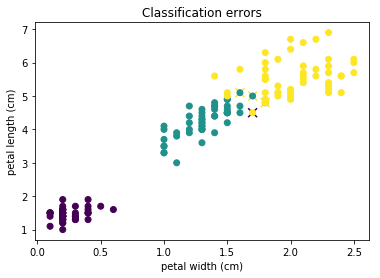

In [7]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

##### Tree visualization

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

to use bash type !command, it might require **conda install graphviz**

In [10]:
!dot -Tpng tree.dot -o tree.png

"dot" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [11]:
from IPython.display import Image
Image('tree.png')

## Cross-validation

In [12]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Fix 5-Fold partitioning

In [13]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Pay attention for the arguments:
  - `shuffle=True` - it shuffles dataset before partitioning, without it every partition would consist of consequent elements which is bad (you can see that in task #2)
  - `random_state` - fixate random state, makes your partition reproducible.

Evaluate quality of KNN regression of the Boston Housing dataset for different values of K (number of neighbours). Consider mean absolute error as a quality metric:
$$MAE = \sum_i|y_{pred,i} - y_i|$$

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Let's try different `n_neighbors` values, for each value evaluate mean and stdandard deviation of MAE using cross-validation. [Magic `%%time`](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) will help you measure time of code execution



In [15]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Eli

Wall time: 352 ms


C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Eli

##### Figure, that describes optimality of parameter selection 

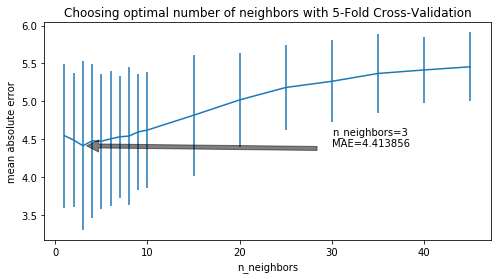

In [16]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))

In [17]:
import numpy as np
import pandas as pd
import urllib2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier


np.set_printoptions(suppress=True)

# 1.Spam classification

In [25]:

spambase_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
spambase_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(spambase_names).readlines()[33:]
]
spam_data = pd.read_csv(spambase_data, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


# How many letters in a dataset ?

In [26]:
print "Letters count =", len(spam_data)

Letters count = 4601


# Which portion of them is bad (spam)?

In [27]:
print "Spam percent =", len(spam_data.groupby('spam').get_group(1)) / float(len(spam_data)) * 100, '%'

Spam percent = 39.4044772875 %


# How you can group letters' features ?

The first group describes percentage of * char

In [33]:
print 'The 1st group =', len([x for x in spam_data.columns.values if x.startswith('char_freq_')])

The 1st group = 6


The second group describes percentage of * word

In [34]:
print 'The 2nd group =', len([x for x in spam_data.columns.values if x.startswith('word_freq_')])

The 2nd group = 48


The third group describes a property of uninterrupted sequences of capital letters
capital_run_length_average = average length of uninterrupted sequences of capital letters
capital_run_length_longest = length of longest uninterrupted sequence of capital letters
capital_run_length_total = total number of capital letters in the e-mail

In [35]:
print 'The 3rd group =', ([x for x in spam_data.columns.values if x.startswith('capital_run_')])

The 3rd group = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']


# 2. Classifier training and it's evaluation

# Split dataset into to disjoint subsets: train - first 3000 examples (≈65%), test - all others

In [36]:
train = spam_data[0:3000]
test = spam_data[3000:]

train, train_res = train.drop('spam', 1), list(train['spam'])
test, test_res = test.drop('spam', 1), list(test['spam'])

# Train decesion tree with train. Classify examples from test. Calculate classification quality metrics, described above: Accuracy, Precision, Recall, F1. [Recommended parameters: split criteria - gini, max_depth: 7]

In [37]:
from sklearn.tree import DecisionTreeClassifier
X, y = train, train_res

random_state = 0

clf = DecisionTreeClassifier(max_depth=7, random_state=random_state).fit(X, y)

dt = {}
dt['pred'] = clf.predict(test)
dt['pred_prob'] = [x[1] for x in clf.predict_proba(test)]

In [38]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


def get_confus_matrix(model, y_true):
    model['acc'] = accuracy_score(y_true, model['pred'])
    model['prec'] = precision_score(y_true, model['pred'])
    model['rec'] = recall_score(y_true, model['pred'])
    model['f1'] = f1_score(y_true, model['pred'])
    
def print_confus_matrix(model):
    print "Accuracy =", model['acc']
    print "Precision =", model['prec']
    print "Recall =", model['rec']
    print "F1 =", model['f1']

In [39]:
get_confus_matrix(dt, test_res)
print_confus_matrix(dt)

Accuracy = 0.767645221736
Precision = 0.0
Recall = 0.0
F1 = 0.0


C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


# Which drawbacks does evaluation on this test have? How you can make evalution more informative?

In [40]:
spam_col = list(spam_data['spam'])
spam = [i for i in range(len(spam_col)) if spam_col[i] == 1]
not_spam = [i for i in range(len(spam_col)) if spam_col[i] == 0]
x = range(len(spam)) == spam
y = all((np.array(range(len(not_spam))) + len(spam)) == not_spam)
print "Is spam and not spam indices are sequantial?", x and y

Is spam and not spam indices are sequantial? True


# Repeat experiment with dataset shuffled before split.

In [44]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(test_size=.35, random_state=random_state)

for train_index, test_index in rs.split(spam_data):
    pass

train = spam_data.iloc[train_index]
test = spam_data.iloc[test_index]

train, train_res = train.drop('spam', 1), list(train['spam'])
test, test_res = test.drop('spam', 1), list(test['spam'])

In [45]:
X, y = train, train_res

clf = DecisionTreeClassifier(max_depth=7, random_state=random_state).fit(X, y)

dts = {}
dts['pred'] = clf.predict(test)
dts['pred_prob'] = [x[1] for x in clf.predict_proba(test)]

In [46]:
get_confus_matrix(dts, test_res)
print_confus_matrix(dts)

Accuracy = 0.91495965239
Precision = 0.915702479339
Recall = 0.865625
F1 = 0.889959839357


# Which features are the most informative? Use feature importance from DecisionTreeClassifier.

In [47]:
most_important_features = np.argsort(clf.feature_importances_)[::-1]
for idx in most_important_features[0:10]:
    print '%d %s, importance = %.2f' % (idx, spam_data.columns.values[idx], clf.feature_importances_[idx])

51 char_freq_!, importance = 0.41
54 capital_run_length_average, importance = 0.12
6 word_freq_remove, importance = 0.11
24 word_freq_hp, importance = 0.07
15 word_freq_free, importance = 0.07
52 char_freq_$, importance = 0.04
16 word_freq_business, importance = 0.02
41 word_freq_meeting, importance = 0.02
7 word_freq_internet, importance = 0.02
45 word_freq_edu, importance = 0.02


# What you can say about quality of the best constant model (constant model always predicts one class)

Constant model with class 0

In [50]:
from sklearn.dummy import DummyClassifier

X, y = train, train_res

clf = DummyClassifier(strategy='constant', random_state=random_state, constant=0).fit(X, y)

const0 = {}
const0['pred'] = clf.predict(test)
const0['pred_prob'] = [x[1] for x in clf.predict_proba(test)]

In [51]:
get_confus_matrix(const0, test_res)
print_confus_matrix(const0)

Accuracy = 0.602731222843
Precision = 0.0
Recall = 0.0
F1 = 0.0


C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Elizaveta\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
X, y = train, train_res

clf = DummyClassifier(strategy='constant', random_state=random_state, constant=1).fit(X, y)

const1 = {}
const1['pred'] = clf.predict(test)
const1['pred_prob'] = [x[1] for x in clf.predict_proba(test)]

In [53]:
get_confus_matrix(const1, test_res)
print_confus_matrix(const1)

Accuracy = 0.397268777157
Precision = 0.397268777157
Recall = 1.0
F1 = 0.568636161706


# Train KNN model and evaluate it on test. [ Recommended parameters: K=10, euclidian metric ]

In [54]:
train = spam_data.iloc[train_index]
test = spam_data.iloc[test_index]

train, train_res = train.drop('spam', 1), list(train['spam'])
test, test_res = test.drop('spam', 1),  list(test['spam'])

In [56]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

X, y = train, train_res
neigh.fit(X, y) 

knn = {}
knn['pred'] = neigh.predict(test)
knn['pred_prob'] = [x[1] for x in neigh.predict_proba(test)]

get_confus_matrix(knn, test_res)
print_confus_matrix(knn)

Accuracy = 0.791433891993
Precision = 0.781481481481
Recall = 0.659375
F1 = 0.715254237288


# Train KNN for rescaled features. Evaluate quality of the model on test. Does that feature transformation increased given metrics for KNN? Repeat experiment for DecisionTree. Why rescaling has no effect on the quality of decision tree?

KNN

In [58]:
from sklearn.preprocessing import scale

resc_data = spam_data.copy()

for lb in [x for x in resc_data.columns.values if x != 'spam']:
    resc_data[lb] = scale(resc_data[lb])
resc_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,...,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724,1
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,...,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324,1
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,...,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733,1
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,...,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222,1
5,-0.342434,-0.165072,-0.556761,-0.0469,2.286862,-0.350266,-0.291794,4.350584,-0.323302,-0.371364,...,-0.158453,0.310623,-0.155198,-0.329912,-0.308355,-0.103048,-0.069076,-0.190757,-0.378189,1
6,-0.342434,-0.165072,-0.556761,-0.0469,2.390960,-0.350266,-0.291794,-0.262562,-0.323302,0.621368,...,-0.158453,-0.314548,-0.155198,-0.128829,-0.088714,-0.103048,-0.110966,-0.247205,-0.282524,1
7,-0.342434,-0.165072,-0.556761,-0.0469,2.331475,-0.350266,-0.291794,4.425392,-0.323302,-0.371364,...,-0.158453,0.247736,-0.155198,-0.329912,-0.308355,-0.103048,-0.086412,-0.211283,-0.386436,1
8,0.148847,-0.165072,0.355778,-0.0469,0.442830,-0.350266,0.474688,-0.262562,2.979094,0.807505,...,-0.158453,0.488187,-0.155198,-0.107985,0.517334,-0.051802,0.143494,2.015841,1.606036,1
9,-0.145921,-0.072080,0.970750,-0.0469,-0.181761,0.818494,0.679083,-0.262562,-0.107929,-0.371364,...,0.005855,-0.403329,-0.155198,-0.030740,0.021107,-0.103048,-0.109138,-0.047071,0.768142,1


In [59]:
train = resc_data.iloc[train_index]
test = resc_data.iloc[test_index]

train, train_res = train.drop('spam', 1), list(train['spam'])
test, test_res = test.drop('spam', 1), list(test['spam'])

In [61]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

X, y = train, train_res
neigh.fit(X, y) 

knnr = {}
knnr['pred'] = neigh.predict(test)
knnr['pred_prob'] = [x[1] for x in neigh.predict_proba(test)]
get_confus_matrix(knnr, test_res)
print_confus_matrix(knnr)

Accuracy = 0.896958410925
Precision = 0.910034602076
Recall = 0.821875
F1 = 0.863711001642


Decision Tree

In [62]:
X, y = train, train_res

clf = DecisionTreeClassifier(max_depth=7, random_state=random_state).fit(X, y)

dtsr = {}
dtsr['pred'] = clf.predict(test)
dtsr['pred_prob'] = [x[1] for x in clf.predict_proba(test)]
get_confus_matrix(knn, test_res)
print_confus_matrix(knn)

Accuracy = 0.791433891993
Precision = 0.781481481481
Recall = 0.659375
F1 = 0.715254237288


# Compare all models by all metrics

In [63]:
stats = pd.DataFrame({})
stats = stats.reindex(index=['Constant', 'Decision tree', 'KNN', 'KNN rescaled'])
stats['Accuracy'] = [const1['acc'], dts['acc'], knn['acc'], knnr['acc']]
stats['Precision'] = [const1['prec'], dts['prec'], knn['prec'], knnr['prec']]
stats['Recall'] = [const1['rec'], dts['rec'], knn['rec'], knnr['rec']]
stats['F1'] = [const1['f1'], dts['f1'], knn['f1'], knnr['f1']]
stats

,Accuracy,Precision,Recall,F1
Constant,0.397269,0.397269,1.000000,0.568636
Decision tree,0.914960,0.915702,0.865625,0.889960
KNN,0.791434,0.781481,0.659375,0.715254
KNN rescaled,0.896958,0.910035,0.821875,0.863711
